Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 205ms/step - loss: 0.0566 - val_loss: 0.0324
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 165ms/step - loss: 0.0286 - val_loss: 0.0227
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 167ms/step - loss: 0.0212 - val_loss: 0.0172
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 164ms/step - loss: 0.0172 - val_loss: 0.0154
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 177ms/step - loss: 0.0156 - val_loss: 0.0148
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 168ms/step - loss: 0.0144 - val_loss: 0.0136
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 168ms/step - loss: 0.0137 - val_loss: 0.0128
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 151ms/step - loss: 0.0129 - val_loss: 0.0127
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 172ms/step - loss: 0.0126 - val_loss: 0.0116
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 162ms/step - loss: 0.0117 - val_loss: 0.0119
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 173ms/step - loss: 0.0122 - val_loss: 0.0112
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━

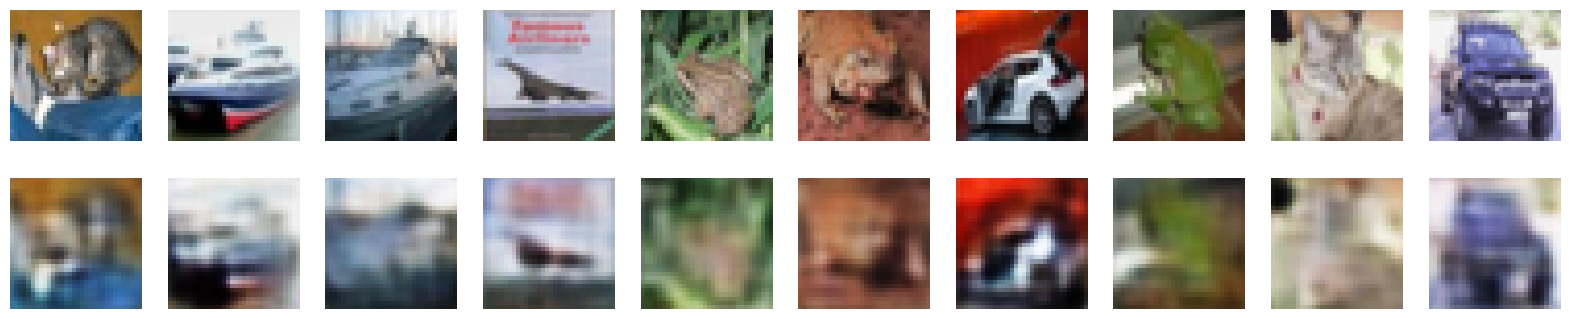

In [4]:
# Question 6: Custom Autoencoder Model for Complex Dataset
# Description: Build a custom autoencoder for a more complex dataset, like CIFAR-10.

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(x_train, _), (x_test, _) = tf.keras.datasets.cifar10.load_data()

x_train = x_train[:1000].astype('float32') / 255.
x_test = x_test[:1000].astype('float32') / 255.

inputs = tf.keras.Input(shape=(32, 32, 3))

# Encoder
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder model
autoencoder = tf.keras.Model(inputs, decoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.fit(x_train, x_train, epochs=100, batch_size=32, validation_data=(x_test, x_test))

decoded_imgs = autoencoder.predict(x_test)

# Display original and reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.axis('off')

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.axis('off')

plt.show()

